# Midterm - Hong Nguyen - USC ID 3335891045

# Question 1

**Libraries**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist as cdist

**Functions**

In [13]:
# Function load data set
# input: # of dataset
def read_midterm_dataset(number):
        if(number == 1):
                train = pd.read_csv("Pr1_dataset1/train.csv")
                val = pd.read_csv("Pr1_dataset1/val.csv")
                test = pd.read_csv("Pr1_dataset1/test.csv")
        else:
                train = pd.read_csv("Pr1_dataset2/train_2.csv")
                val = pd.read_csv("Pr1_dataset2/val_2.csv")
                test = pd.read_csv("Pr1_dataset2/test_2.csv")                
        X_train, y_train = train.iloc[:,:2].to_numpy(), train.iloc[:,2].to_numpy()
        X_val, y_val = val.iloc[:,:2].to_numpy(), val.iloc[:,2].to_numpy()
        X_test, y_test = test.iloc[:,:2].to_numpy(), test.iloc[:,2].to_numpy()
        return X_train, y_train, X_val, y_val, X_test, y_test
        
# Define a RBF kernel
# input: 
#       x1, x2: Data point
#       gamma : Coefficient of RBF kernel
def RBF_kernel(x1, x2, gamma):
    return np.exp(-gamma * cdist(x1, x2, 'euclidean'))

# Define a linear kernel
# input: 
#       x1, x2: Data point
#       gamma : No meaning (just for sync to pass function as parametter)
def liner_kernel(x1, x2, gamma):
    return np.dot(x1,x2.T)

# Define a nearest mean classifier object
# input: 
#       X_train : train data
#       y_train : label
#       kernel  : kernel function which define above
class nearest_mean_2class():
    def __init__(self, X_train, y_train, kernel) -> None:
        self.X_train = X_train
        self.y_train = y_train
        self.kernel = kernel
        self.class1_idx = np.where(y_train==1)[0]
        self.class2_idx = np.where(y_train==2)[0]
        self.N1 = self.class1_idx.shape[0]
        self.N2 = self.class2_idx.shape[0]

    def g(self,x,gamma):
        ans = 2/self.N1 * np.sum(self.kernel(x.reshape((1,2)),self.X_train[self.class1_idx],gamma)) \
        - 2/self.N2 * np.sum(self.kernel(x.reshape((1,2)),self.X_train[self.class2_idx],gamma)) \
        - 1/self.N1**2 * np.sum(np.sum(self.kernel(self.X_train[self.class1_idx],self.X_train[self.class1_idx],gamma))) \
        + 1/self.N2**2 * np.sum(np.sum(self.kernel(self.X_train[self.class2_idx],self.X_train[self.class2_idx],gamma)))
        return ans

# Function that plot the data plot the training 
# data and decision regions in the original feature space
# Input : 
#       training: train data
#       label_train: train label
#       mode: Nearest mean classifier model object only
def plotDecBoundaries(training, label_train, model, gamma):
        nclass =  max(np.unique(label_train))

        # Set the feature range for ploting
        max_x = np.ceil(max(training[:, 0])) + 1
        min_x = np.floor(min(training[:, 0])) - 1
        max_y = np.ceil(max(training[:, 1])) + 1
        min_y = np.floor(min(training[:, 1])) - 1

        xrange = (min_x, max_x)
        yrange = (min_y, max_y)

        # step size for how finely you want to visualize the decision boundary.
        inc = 0.05

        # generate grid coordinates. this will be the basis of the decision
        # boundary visualization.
        (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

        # size of the (x, y) image, which will also be the size of the
        # decision boundary image that is used as the plot background.
        image_size = x.shape
        xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.
        print(xy.shape)

        # distance measure evaluations for each (x,y) pair.
        pred_label = []
        for i in range(len(xy)):
                pred_label.append(np.where(model.g(xy[i],gamma) > 0,0,1).tolist())
        pred_label = np.array(pred_label)
        pred_label.shape

        # reshape the idx (which contains the class label) into an image.
        decisionmap = pred_label.reshape(image_size, order='F')

        #show the image, give each coordinate a color according to its class label
        plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

        # plot the class training data.
        plt.plot(training[label_train == 1, 0],training[label_train == 1, 1], 'rx')
        plt.plot(training[label_train == 2, 0],training[label_train == 2, 1], 'go')
        if nclass == 3:
                plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')

        # include legend for training data
        if nclass == 3:
                l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
        else:
                l = plt.legend(('Class 1', 'Class 2'), loc=2)
        plt.gca().add_artist(l)
        plt.show()


**Dataset 1**

Import dataset 1

In [3]:
X_train1, y_train1, X_val1, y_val1, X_test1, y_test1 = read_midterm_dataset(1)

d) Code a 2-class kernel nearest means classifier

In [31]:
model1 = nearest_mean_2class(X_train1, y_train1, RBF_kernel)
k = np.arange(-3,3, 0.1)
gamma = np.power(10,k)
acc = np.zeros(len(gamma))
for j in range(len(gamma)):
        predicted = []
        for i in range(len(X_val1)):
                predicted.append(np.where(model1.g(X_val1[i],gamma[j]) > 0,1,2).tolist())
        acc[j] = np.mean(predicted == y_val1)

e) Plot the validation-set classification error as a function of gamma for dataset 1, for RBF kernel

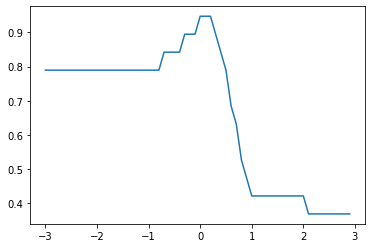

In [7]:
plt.plot(k,acc)

Pick the optimal value of gamma

In [32]:
np.max(acc)

0.9473684210526315

In [12]:
gamma_opt = gamma[np.argmax(acc)]
gamma_opt

1.0000000000000062

f) Compare test-set error using the linear kernel with test-set error using the RBF kernel, for each dataset. Comment on the results.

In [27]:
predicted = []
for i in range(len(X_test1)):
        predicted.append(np.where(model1.g(X_test1[i],1) > 0,1,2).tolist())
acc_test = np.mean(predicted == y_test1)
acc_test

0.7575757575757576

Comment: the accuracy is not good in compare with validation set

g) For the linear kernel, plot the training data, decision regions and boundary, in the feature space, for dataset 1.

In [8]:
model1_linear = nearest_mean_2class(X_train1, y_train1, liner_kernel)
predicted = []
for i in range(len(X_val1)):
        predicted.append(np.where(model1_linear.g(X_val1[i],1) > 0,1,2).tolist())
acc_linear = np.mean(predicted == y_val1)

In [9]:
# Linear model accuracy
acc_linear

0.6842105263157895

(145161, 2)


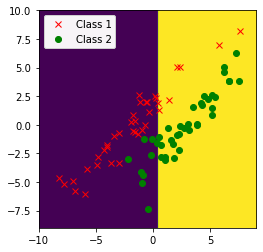

In [14]:
plotDecBoundaries(X_train1, y_train1, model1_linear, 1)

h) For the RBF kernel with optimal γ, plot the training data and decision regions in the original feature space, for each dataset

(145161, 2)


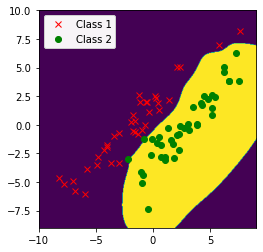

In [15]:
plotDecBoundaries(X_train1, y_train1, model1, gamma_opt)

i) For the RBF kernel, repeat part (h) except for different gamma

In [17]:
# Because we see that, gamma_opt approximately = 1 and 1 also make highest accuracy. 
# Lets pick gamma_opt = 1
gamma_opt = 1

(145161, 2)


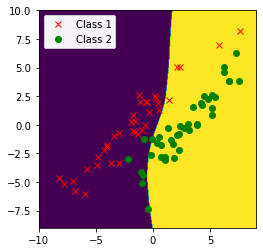

(145161, 2)


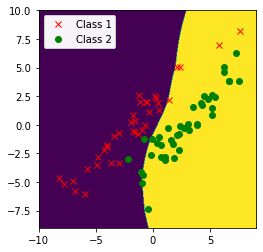

(145161, 2)


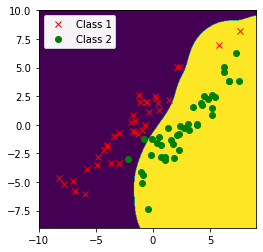

(145161, 2)


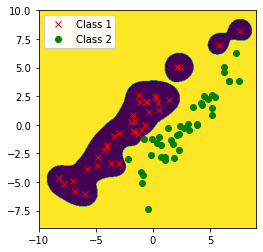

(145161, 2)


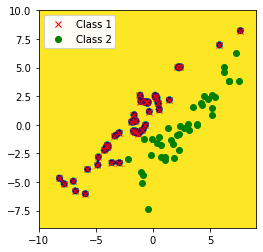

(145161, 2)


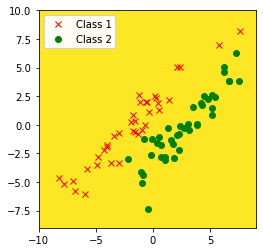

In [18]:
gamma = gamma_opt*[0.01, 0.1, 0.3, 3, 10,100]
for j in gamma:
        plotDecBoundaries(X_train1, y_train1, model1, j)

**dataset 2**

Import dataset 2

In [19]:
X_train2, y_train2, X_val2, y_val2, X_test2, y_test2 = read_midterm_dataset(2)
# Change label from (0,1) to (1,2) to match with dataset 1
y_train2 = y_train2 + 1
y_val2 = y_val2 + 1
y_test2 = y_test2 + 1

d) Train a 2-class kernel nearest means classifier with RBF

In [20]:
model2 = nearest_mean_2class(X_train2, y_train2, RBF_kernel)
k = np.arange(-3,3, 0.1)
gamma = np.power(10,k)
acc = np.zeros(len(gamma))
for j in range(len(gamma)):
        predicted = []
        for i in range(len(X_val2)):
                predicted.append(np.where(model2.g(X_val2[i],gamma[j]) > 0,1,2).tolist())
        acc[j] = np.mean(predicted == y_val2)

e) Plot the validation-set classification error as a function of γ, for each dataset, for RBF kernel

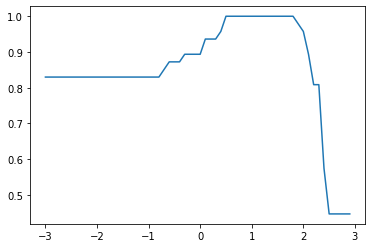

In [107]:
plt.plot(k,acc)

Pick the optimal value of gamma

In [110]:
np.max(acc)

1.0

In [29]:
gamma2_opt = gamma[np.argmax(acc)]
gamma2_opt

3.162277660168402

f) Compare test-set error using the linear kernel with test-set error using the RBF kernel, for each dataset.

In [111]:
predicted = []
for i in range(len(X_test2)):
        predicted.append(np.where(model2.g(X_test2[i],1) > 0,1,2).tolist())
acc_test = np.mean(predicted == y_test2)
acc_test

0.8930817610062893

Comment: The test set error is good with respect to dataset 1

g) For the linear kernel, train and plot the training data, decision regions and boundary, in the feature space, for each dataset

In [22]:
model2_linear = nearest_mean_2class(X_train2, y_train2, liner_kernel)
predicted = []
for i in range(len(X_val2)):
        predicted.append(np.where(model2_linear.g(X_val2[i],1) > 0,1,2).tolist())
acc_linear = np.mean(predicted == y_val2)

In [23]:
acc_linear

0.8085106382978723

(8181, 2)


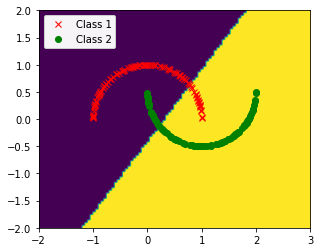

In [24]:
plotDecBoundaries(X_train2, y_train2, model2_linear, 1)

h) For the RBF kernel with optimal γ, plot the training data and decision regions in the original feature space, for dataset 2.

(8181, 2)


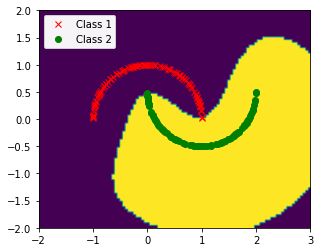

In [26]:
plotDecBoundaries(X_train2, y_train2, model2, gamma2_opt)

i) For the RBF kernel, repeat part (h) except for different gamma

(8181, 2)


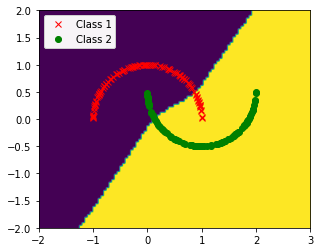

(8181, 2)


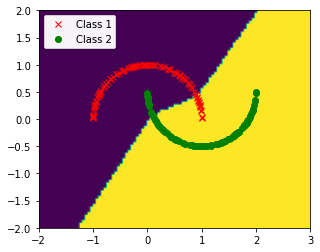

(8181, 2)


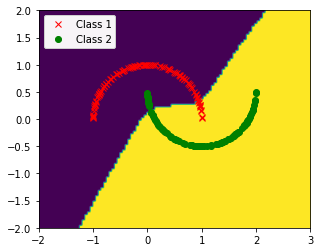

(8181, 2)


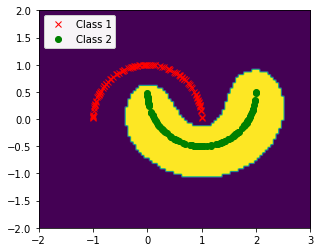

(8181, 2)


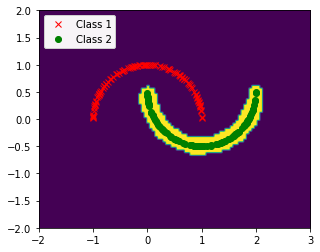

(8181, 2)


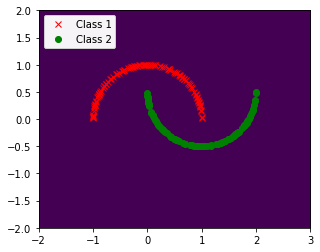

In [28]:
gamma2 = gamma2_opt*np.array([0.01, 0.1, 0.3, 3, 10,100])
for j in gamma2:
        plotDecBoundaries(X_train2, y_train2, model2, j)